# 07wk-2: 마코프체인 (3)

최규빈  
2023-04-13

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-zAMowm9anbqZG0fCAmFI_1>

# import

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
def rain(before):
    if before == True: # 비가 왔음 
        after = np.random.rand() < 0.9
    else: # 비가 안왔음 
        after = np.random.rand() < 0.2 
    return after 

In [124]:
def doctor_strange(X0): # X0=today 
    lst = [X0]
    for i in range(10000): 
        lst.append(rain(lst[i]))
    return lst 

# 날씨모형 리뷰

## formular

`-` 저번시간에 살펴본 날씨모형은 결국 아래와 같은 모형이었다.

$$\begin{bmatrix}
P(X_{t+1}=0) \\
P(X_{t+1}=1)
\end{bmatrix}= \begin{bmatrix} 0.8 & 0.1 \\ 0.2 & 0.9 \end{bmatrix} \begin{bmatrix}
P(X_{t}=0) \\
P(X_{t}=1)
\end{bmatrix}$$

양변에 트랜스포즈를 취하게 되면

$$\begin{bmatrix}
P(X_{t+1}=0) &
P(X_{t+1}=1)
\end{bmatrix}= \begin{bmatrix}
P(X_{t}=0) &
P(X_{t}=1)
\end{bmatrix}\begin{bmatrix} 0.8 & 0.2 \\ 0.1 & 0.9 \end{bmatrix} $$

수식화하면 아래와 같이 된다. (보통 이러한 형태로 책에 많이 쓰니까 이
형태로 외울것!)

$${\boldsymbol \mu}_{t+1}^\top ={\boldsymbol \mu}_{t}^\top {\bf P}$$

> 참고: $X_t$는 0 혹은 1의 값을 가질수 있는데, 이렇게 $X_t$가 가질 수
> 있는 값들을 모은 공간을 상태공간이라고 하고 기호로는 $V=\{0,1\}$와
> 같이 표현한다.

> 참고: 여기에서 확률과정 $\{X_t\}$는 이전시점의 값 $X_{t-1}$에
> 의하여서만 결정된다. 이러한 확률과정을 마코프체인이라고 한다.

> 참고: 이때 매트릭스 ${\bf P}$를 transition matrix 라고 한다.

`-` ${\bf P}$의 의미 ($\star$)

${\bf P}$의 각 원소를 아래와 같이 두자.

-   ${\bf P} = \begin{bmatrix} p_{00} & p_{01} \\ p_{10} & p_{11} \end{bmatrix}$

${\bf P}$의 $(i,j)$의 원소는 $i \to j$로 이동할 확률을 의미한다. 즉
$p_{00}$, $p_{01}$, $p_{10}$, $p_{11}$ 은 각각 아래를 의미한다.

-   $p_{00}$: $0 \to 0$일 확률. 즉 $P(X_t = 0 | X_{t-1} = 0)$
-   $p_{01}$: $0 \to 1$일 확률. 즉 $P(X_t = 1 | X_{t-1} = 0)$
-   $p_{10}$: $1 \to 0$일 확률. 즉 $P(X_t = 0 | X_{t-1} = 1)$
-   $p_{11}$: $1 \to 1$일 확률. 즉 $P(X_t = 1 | X_{t-1} = 1)$

`-` ${\boldsymbol \mu}$의 의미 ($\star$)

-   ${\boldsymbol \mu}_t$는 $X_t$의 pmf를 의미한다.
-   ${\boldsymbol \mu}_0$는 $X_0$의 pmf를 의미한다. 즉 초기분포를
    의미한다.
-   ${\boldsymbol \mu}$자체가 어떠한 분포를 의미한다.

## 특징들

`-` 특징1: ${\bf P}$는 수렴한다. 즉 ${\bf P}^{\infty}$가 존재한다.

In [184]:
P = np.array([[0.8, 0.2],[0.1, 0.9]])
P

In [185]:
np.linalg.matrix_power(P,1),np.linalg.matrix_power(P,10),np.linalg.matrix_power(P,30),np.linalg.matrix_power(P,50)

In [186]:
Plim = np.linalg.matrix_power(P,100)

`-` 특징2: ${\bf P}^{\infty}$의 each column은 모두 동일한 값을 가진다.
$\Rightarrow$ $\mu$에 어떠한 값을 넣어도
${\boldsymbol \mu}^\top{\bf P}^{\infty}={\boldsymbol \pi}^\top = [1/3, 2/3]$
$\Rightarrow$ ${\bf P}$의 아무 row 나 선택하여 그것을
${\boldsymbol \pi}^\top$라고 두자. ${\boldsymbol \pi}$는 $X_{\infty}$의
pmf가 된다.

In [187]:
μ = np.array([[0.5],[0.5]]) 
μ.T @ Plim

In [216]:
π = np.array([1/3,2/3]).reshape(2,1)
π

-   $X_{\infty}=\begin{cases} 0 & w.p.~ 1/3 \\ 1 & w.p.~ 2/3 \end{cases}$

> 참고: 여기에서 ${\boldsymbol \pi}$를 확률과정 $\{X_t\}$의 정상분포
> (stationary distribution) 라고 한다.

`-` 특징3: ${\boldsymbol \pi}^\top {\bf P} = {\boldsymbol \pi}^\top$ 가
성립한다.

-   근데 이건 왜 이러지?

In [217]:
π.T @ P

당연히 다른 분포 ${\boldsymbol \mu}$에 대하여서는 성립하지 않음

In [218]:
μ = np.array([[0.5],[0.5]]) 
μ.T @ P

> 참고: 여기에서 수식
> ${\boldsymbol \pi}^\top {\bf P} = {\boldsymbol \pi}^\top$ 자체가
> 정상분포의 정의가 된다. 즉 마코프체인 $\{X_t\}$의 트랜지션 매트릭스가
> ${\bf P}$일때,
> ${\boldsymbol \pi}^\top {\bf P} = {\boldsymbol \pi}^\top$를 만족하는
> ${\boldsymbol \pi}$가 존재한다면 ${\boldsymbol \pi}$를 확률과정
> $\{X_t\}$의 정상분포라고 한다.

`-` 특징4: 초기분포 ${\boldsymbol \mu}_0$를 ${\boldsymbol \pi}$로
설정하면 $\{X_t\}$는 모든 $t$에 대하여 동일한 분포를 가진다. (독립은
아니다)

In [219]:
π # 초기분포: X0의 pmf 

In [220]:
X0 = np.random.rand() < 2/3
# X0 = np.random.rand() > 0.52941176

In [221]:
arr = np.array([doctor_strange(np.random.rand() < 2/3) for i in range(4305)])
arr

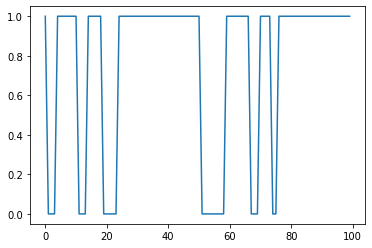

In [222]:
plt.plot(arr[0][-100:])

In [223]:
arr[:,0]*1

In [224]:
arr[:,-1].sum()

In [225]:
arr[:,0].sum()

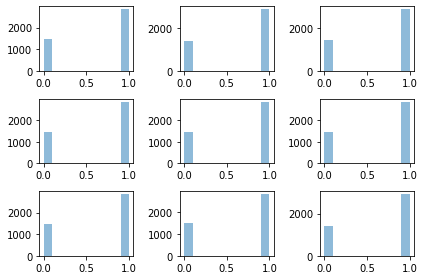

In [226]:
fig, ax = plt.subplots(3,3)
ax[0][0].hist(arr[:,0]*1,alpha=0.5);
ax[0][1].hist(arr[:,500]*1,alpha=0.5);
ax[0][2].hist(arr[:,1000]*1,alpha=0.5);
ax[1][0].hist(arr[:,1500]*1,alpha=0.5);
ax[1][1].hist(arr[:,2000]*1,alpha=0.5);
ax[1][2].hist(arr[:,2500]*1,alpha=0.5);
ax[2][0].hist(arr[:,3000]*1,alpha=0.5);
ax[2][1].hist(arr[:,3500]*1,alpha=0.5);
ax[2][2].hist(arr[:,4000]*1,alpha=0.5);
fig.tight_layout()

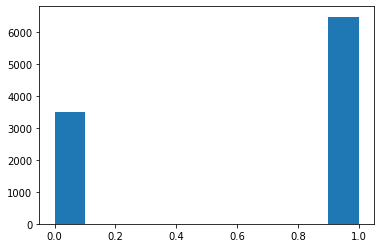

In [227]:
plt.hist(arr[0]*1)

**특징4의 변형**: 초기분포가 ${\boldsymbol \pi}$가 아니더라도 적당한
시점 $T_0$ 이후에는 $\{X_t\}_{t\geq T_0}$는 동일한분포를 가진다고 볼 수
있다.

> 참고: 특징4는 후에 MCMC를 이해하는 중요한 예제가 된다.

## 특징3을 위한 약간의 해설

편의상 ${\bf P}^{\star}={\bf P}^{\infty}$ 라고 하자. 이미 살펴본 것 처럼

-   ${\bf P}^\star {\bf P} = {\bf P}^\star$

가 성립한다. 특징2에서 살펴본것 처럼 임의의 ${\boldsymbol \mu}$에 대하여
${\boldsymbol \mu}^\top {\bf P}^{\star} = {\boldsymbol \pi}^\top$ 가
항상 성립함을 확인할 수 있다. 이 수식을 살짝 변형하면

-   ${\boldsymbol \mu}^\top {\bf P}^{\star} = {\boldsymbol \pi}^\top$
-   $\Rightarrow ({\boldsymbol \mu}^\top{\bf P}^{\star}){\bf P} = {\boldsymbol \pi}^\top$
-   $\Rightarrow {\boldsymbol \pi}^\top{\bf P} = {\boldsymbol \pi}^\top$

이다. 따라서 특징3이 유도된다.